In [1]:
# Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
plt.style.use("default")

In [2]:
# Reading Dataset

df_raw = pd.read_csv("supply_chain_data.csv")
df_raw.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Supplier name,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,4,Carrier B,2.956572,Supplier 3,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,2,Carrier A,9.716575,Supplier 3,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,2,Carrier B,8.054479,Supplier 1,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,6,Carrier C,1.729569,Supplier 5,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,8,Carrier A,3.890548,Supplier 1,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [3]:
# Checking column names

df_raw.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [4]:
# Standardizing column names 

df_raw.columns = (
    df_raw.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

In [5]:
# Initial Inspection 

print("Shape of data set is", df_raw.shape, "\n")

print(df_raw.info(), "\n")

print(df_raw.isnull().mean().sort_values(ascending=False))

Shape of data set is (100, 24) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             100 non-null    object 
 1   sku                      100 non-null    object 
 2   price                    100 non-null    float64
 3   availability             100 non-null    int64  
 4   number_of_products_sold  100 non-null    int64  
 5   revenue_generated        100 non-null    float64
 6   customer_demographics    100 non-null    object 
 7   stock_levels             100 non-null    int64  
 8   lead_times               100 non-null    int64  
 9   order_quantities         100 non-null    int64  
 10  shipping_times           100 non-null    int64  
 11  shipping_carriers        100 non-null    object 
 12  shipping_costs           100 non-null    float64
 13  supplier_name            100 non-null    object 

It is a small dataset of 100 items,24 columns. It si clean and has no null values

In [6]:
# Keeping only relevant columns

df = df_raw[
    [
        "product_type",
        "sku",
        "price",
        "availability",
        "number_of_products_sold",
        "revenue_generated",
        "stock_levels",
        "lead_times",
        "order_quantities",
        "shipping_times",
        "shipping_carriers",
        "shipping_costs",
        "supplier_name",
        "location",
        "transportation_modes",
        "costs"
    ]
].copy()

In [7]:
# Numeric conversion

numeric_cols = [
    "price",
    "availability",
    "number_of_products_sold",
    "revenue_generated",
    "stock_levels",
    "lead_times",
    "order_quantities",
    "shipping_times",
    "shipping_costs",
    "costs"
]

df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors="coerce")


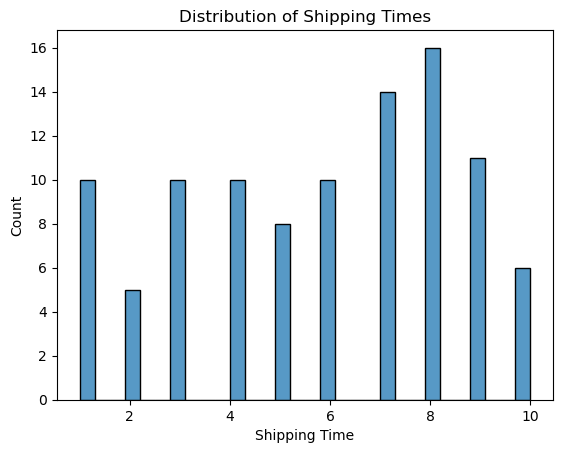

In [8]:
# Delivery related analysis 

# Plot of delivery times distribution

sns.histplot(df["shipping_times"], bins=30)
plt.title("Distribution of Shipping Times")
plt.xlabel("Shipping Time")
plt.show()

Delivery performance appears stable, with most shipments completing within a predictable time window. However, faster delivery options seem limited, indicating potential opportunities for service-level differentiation or premium shipping offerings.

In [9]:
# Delivery KPI's

# 1. Average shipping time

avg_shipping_time = df["shipping_times"].mean()
print(f"Average shipping time is {avg_shipping_time}")

Average shipping time is 5.75


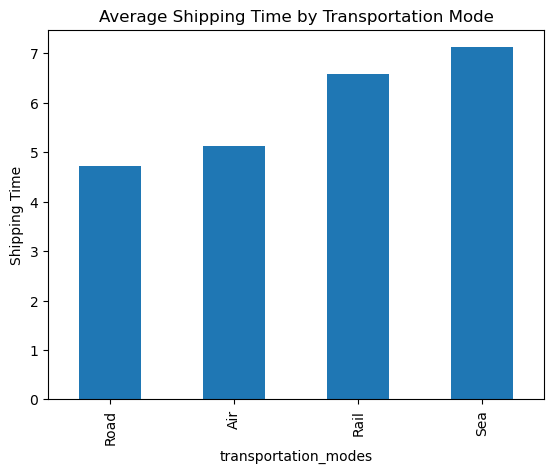

In [10]:
# Shipping time by transport mode 

shipping_by_mode = (
    df.groupby("transportation_modes")["shipping_times"]
    .mean()
    .sort_values()
)

shipping_by_mode.plot(kind="bar")
plt.title("Average Shipping Time by Transportation Mode")
plt.ylabel("Shipping Time")
plt.show()


Road and air transport deliver faster on average, while rail and sea shipments take longer. This reflects the trade-off between speed and cost commonly seen in supply chains, where faster modes are used for time-sensitive deliveries and slower modes for bulk or cost-efficient transport.

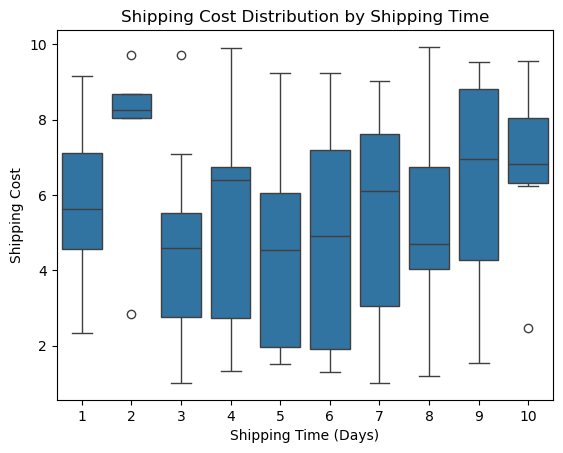

In [11]:
# 3. Shipping cost vs shipping time 

sns.boxplot(
    data=df,
    x="shipping_times",
    y="shipping_costs"
)

plt.title("Shipping Cost Distribution by Shipping Time")
plt.xlabel("Shipping Time (Days)")
plt.ylabel("Shipping Cost")
plt.show()


Shipping costs show high variability across all delivery times, with no clear linear relationship between cost and shipping duration. This suggests that factors such as carrier selection, transportation mode, and route characteristics play a larger role in determining shipping cost than delivery time alone.

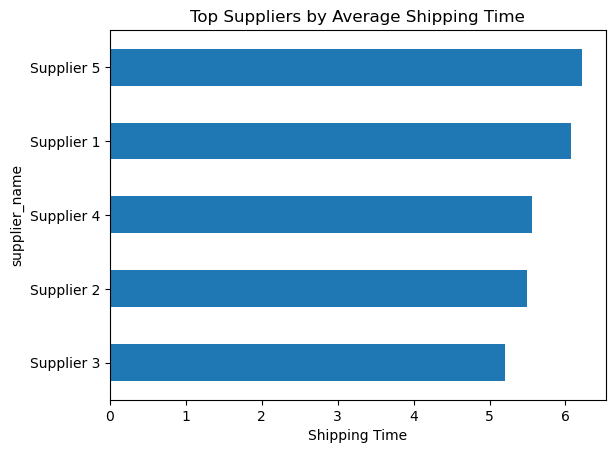

In [12]:
# 4. Supplier delivery performance

supplier_shipping = (
    df.groupby("supplier_name")["shipping_times"]
    .mean()
    .sort_values()
    .head(10)
)

supplier_shipping.plot(kind="barh")
plt.title("Top Suppliers by Average Shipping Time")
plt.xlabel("Shipping Time")
plt.show()

Shipping performance varies meaningfully across suppliers. While some suppliers consistently deliver in around 5 days, others take over 6 days on average, which can impact inventory availability and customer fulfillment timelines.

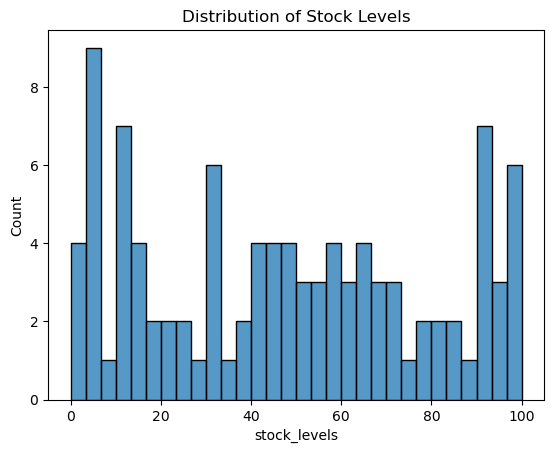

In [13]:
# Inventory and Demand analysis 

# Stock levels distribution

sns.histplot(df["stock_levels"], bins=30)
plt.title("Distribution of Stock Levels")
plt.show()

Stock levels vary significantly across products, indicating different inventory strategies. Some items appear at risk of stockouts, while others may be overstocked, suggesting opportunities to better align inventory with demand.

In [14]:
# KPI's for inventory

# 1. Avg stock level

avg_stock = df["stock_levels"].mean()
print(f"Average stock levels are: {avg_stock}")


Average stock levels are: 47.77


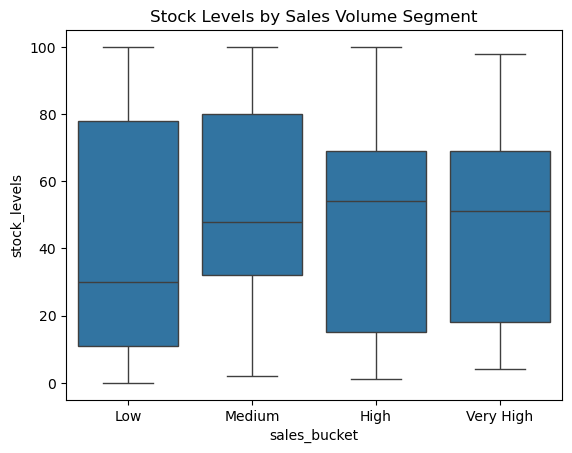

In [15]:
# 2. Box-Plots by sales buckets

df["sales_bucket"] = pd.qcut(
    df["number_of_products_sold"],
    q=4,
    labels=["Low", "Medium", "High", "Very High"]
)

sns.boxplot(
    data=df,
    x="sales_bucket",
    y="stock_levels"
)
plt.title("Stock Levels by Sales Volume Segment")
plt.show()


Stock levels vary widely across sales volume segments. While higher-selling products generally have higher stock levels, the relationship is not proportional. Several low-sales products maintain high inventory, indicating potential overstocking, while some top-selling products operate with comparatively low stock levels, suggesting possible stock-out risk. This highlights opportunities to better align inventory allocation with actual demand

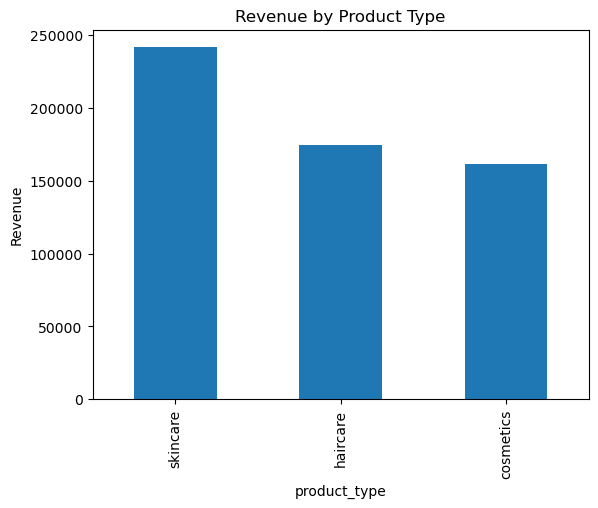

In [16]:
# 3. Product type performance

product_sales = (
    df.groupby("product_type")["revenue_generated"]
    .sum()
    .sort_values(ascending=False)
)

product_sales.plot(kind="bar")
plt.title("Revenue by Product Type")
plt.ylabel("Revenue")
plt.show()

Skincare products generate the highest revenue, making them the most important category for the business. Haircare and cosmetics contribute less, suggesting either lower demand, lower pricing, or smaller product ranges in those categories.

Key Insights and Conclusion

Delivery performance across the supply chain is generally stable, with most shipments completed within a predictable time window. However, limited availability of faster delivery options suggests potential for differentiated service levels.

Transportation mode plays a significant role in delivery speed. Road and air transport are faster on average, while rail and sea shipments take longer, reflecting the classic trade-off between speed and cost in supply chain operations.

Shipping costs show high variability across delivery times, indicating that cost is influenced more by factors such as transportation mode, carrier selection, and route characteristics than by delivery time alone.

Supplier performance varies meaningfully, with some suppliers consistently delivering faster than others. This variation can impact inventory planning and customer fulfillment reliability.

Inventory levels differ substantially across products and sales segments. Several low-selling products maintain high stock levels, indicating potential overstocking, while some high-selling products operate with relatively low stock, suggesting stock-out risk.

Product-level revenue analysis shows that skincare products generate the highest revenue, making them the most strategically important category, while haircare and cosmetics contribute less overall.

Overall, this analysis highlights key operational inefficiencies and improvement opportunities across delivery performance, supplier management, inventory allocation, and product strategy. The findings demonstrate how descriptive analytics can support data-driven supply chain decision-making.